Automate a set of models and summarize model results. In this example we'll test how well we can model each variable in a dataset based on the other variables.

Create a connection to Eureqa:

In [1]:
from eureqa import Eureqa

e = Eureqa(url="https://rds.nutonian.com", user_name="user@nutonian.com", 
           key="JA24SZI94AKV0EJAEVPK")

Get the list of variables in the dataset:

In [2]:
data_source = e.create_data_source("Sales & Marketing", "sales_marketing.csv")
variables = set(data_source.get_variables())
variables

{u'Avg_Temp',
 u'Days_Precipitation',
 u'Days_Rain',
 u'Days_Snow',
 u'Emails_Clicked',
 u'Emails_Opened',
 u'Emails_Sent',
 u'Flyer_Spend',
 u'Inches_Rain',
 u'Inches_Snow',
 u'Max_Temp',
 u'Min_Temp',
 u'Online_Ad_Spend',
 u'Sales',
 u'TV_Ad_Spend',
 u'Web_New_Visitors',
 u'Web_Returning_Visitors',
 u'Web_Total_Visits',
 u'Web_Unique_Visitors',
 u'Week'}

In [4]:
searches = []
for variable in variables:
    settings = e.search_templates.numeric("Model for variable: %s" % variable, 
                                          variable, variables - {variable})
    search = data_source.create_search(settings)
    search.submit(2)
    searches.append(search)
searches

[<eureqa.search.Search instance at 0x00000000046A3E48>,
 <eureqa.search.Search instance at 0x00000000046A3848>,
 <eureqa.search.Search instance at 0x000000000472BDC8>,
 <eureqa.search.Search instance at 0x00000000046A39C8>,
 <eureqa.search.Search instance at 0x00000000046A3608>,
 <eureqa.search.Search instance at 0x0000000004748E48>,
 <eureqa.search.Search instance at 0x00000000046E6A48>,
 <eureqa.search.Search instance at 0x0000000004701D48>,
 <eureqa.search.Search instance at 0x0000000004748A08>,
 <eureqa.search.Search instance at 0x0000000004748A48>,
 <eureqa.search.Search instance at 0x0000000004701F48>,
 <eureqa.search.Search instance at 0x000000000480A748>,
 <eureqa.search.Search instance at 0x00000000047EA408>,
 <eureqa.search.Search instance at 0x000000000486AB08>,
 <eureqa.search.Search instance at 0x000000000480A588>,
 <eureqa.search.Search instance at 0x0000000004889A48>,
 <eureqa.search.Search instance at 0x000000000486A548>,
 <eureqa.search.Search instance at 0x00000000048

Wait for searches to complete.  Print the best solution for each search as they complete:

In [5]:
for search in searches:
    search.wait_until_done()
    best_solution = search.get_best_solution()
    print 'Best model for the %s variable is %s' % (best_solution.target, best_solution.model)

Best model for the Week variable is 0.318191337724807 + 0.648759972160649*step(14.9834893404746 + 224.504952816115*Inches_Rain - 0.241807519877208*Emails_Clicked*Days_Snow)
Best model for the Web_Unique_Visitors variable is 1.04484030337699 + 1.00003420535283*Web_New_Visitors + 0.999968858451333*Web_Returning_Visitors
Best model for the Inches_Rain variable is 0.14180331189039 + 0.389285765629462*Days_Rain + 0.0124599517651205*Max_Temp*Days_Snow*if(Days_Rain, Days_Rain, Days_Rain)*less(Days_Rain^2, 34.9648397385641)
Best model for the Web_Returning_Visitors variable is 1.00001733340471*Web_Unique_Visitors - 0.946614979140577 - 1.00001961497412*Web_New_Visitors
Best model for the Days_Snow variable is Days_Precipitation - Days_Rain
Best model for the Days_Precipitation variable is Days_Rain + Days_Snow
Best model for the Emails_Opened variable is Week + 3.58602233572101*Emails_Clicked + 1.79569685179191*Days_Rain + 0.0192648881611015*Emails_Sent - Week^4*step(Week)*min(Week, Days_Rain) 

Plot the error metric values to show which variables are easiest and hardest to predict:

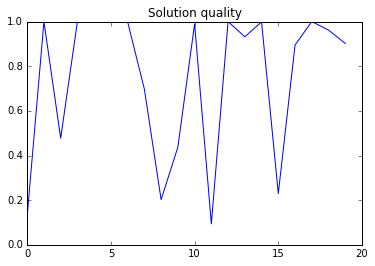

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

error_metric = searches[0].error_metric
solutions = [search.get_best_solution() for search in searches]

plt.plot(range(len(solutions)), [s.get_error_metric_value(error_metric) for s in solutions])
plt.title('Solution quality')
plt.show()